# Car Insurance Fraud Detection

#### Objective: To detect whether an insurance claim is fraudulent or authentic.

# Data Gathering and Preparation

In [1]:
import pandas as pd
df = pd.read_csv('car_insurance.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [2]:
#number of rows and columns
df.shape

(1000, 40)

In [3]:
#checking the columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
#removing the unnecessary features
df = df.drop('policy_number', axis=1)
df = df.drop('_c39', axis=1)

In [5]:
#displaying first 5 rows
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [6]:
#importing numpy
import numpy as np

In [7]:
#deriving a feature months between 'policy bind date' and 'incident date'
df['incident_date'] #checking the feature 'incident_date'
df['incident_date'] = pd.to_datetime(df.incident_date)
df['policy_bind_date'] #checking the feature 'policy_bind_date'
df['policy_bind_date'] = pd.to_datetime(df.policy_bind_date)
df['months_bw_incident_and_bind'] = ((df.incident_date - df.policy_bind_date)/np.timedelta64(1, 'M')) #difference bw incident and bind
df['months_bw_incident_and_bind'] = df['months_bw_incident_and_bind'].astype(int) #converting to integers
df['months_bw_incident_and_bind'] #checking the feature
df


,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,3
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,102
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,173
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,295
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,283
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,12
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,143
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,39


In [8]:
#deriving a feature indicating whether months between policy bind date and incident date falls within month as customer
#q1
df['incident_within_customership'] = df[['months_bw_incident_and_bind','months_as_customer']].apply(lambda x: 1 if x.months_as_customer >= x.months_bw_incident_and_bind and x.months_bw_incident_and_bind > 0 else 0, axis=1)
df['capital-loss'] = df['capital-loss'].abs() #absolute of this feature
df['capital-loss'] #checking this feature

0          0
1          0
2          0
3      62400
4      46000
       ...  
995        0
996        0
997        0
998        0
999        0
Name: capital-loss, Length: 1000, dtype: int64

## Data Quality Check

In [9]:
#check for consistency in data: Total claim must be equal to sum of 'injury_claim', 'property_claim', 'vehicle_claim' and print the number of rows where it does not hold true
print(df[df['total_claim_amount'] != df['injury_claim'] + df['property_claim'] + df['vehicle_claim']].shape[0])

#check for accepted range or set of values and print the number of rows where value < 0 in each numerical column
for i in dict(df.dtypes):
  if(dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] == 'float64'):
    print(i , " : ", df[df[i]<0].shape[0])

0
months_as_customer  :  0
age  :  0
policy_deductable  :  0
policy_annual_premium  :  0
umbrella_limit  :  1
insured_zip  :  0
capital-gains  :  0
capital-loss  :  0
incident_hour_of_the_day  :  0
number_of_vehicles_involved  :  0
bodily_injuries  :  0
witnesses  :  0
total_claim_amount  :  0
injury_claim  :  0
property_claim  :  0
vehicle_claim  :  0
auto_year  :  0
months_bw_incident_and_bind  :  0
incident_within_customership  :  0


In [10]:
#treating unaccepted value by row removal
df.drop(df.index[df[df['umbrella_limit']<0].index[0]], inplace = True)
print(df[df['umbrella_limit']<0].shape[0]) #checking

0


## Ways of Detecting extreme values(outliers):
#### - Boxplots
#### - Z-score
#### - Inter Quantile Range (IQR)

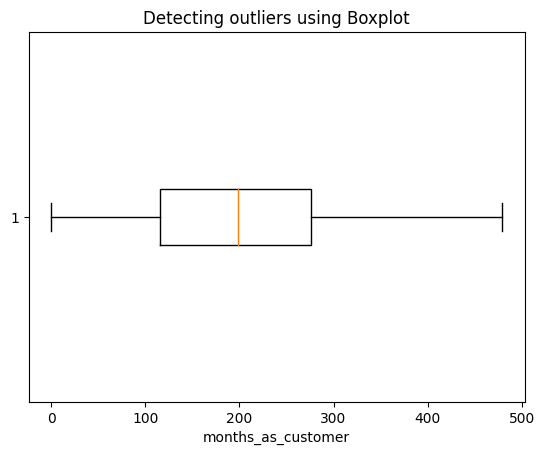

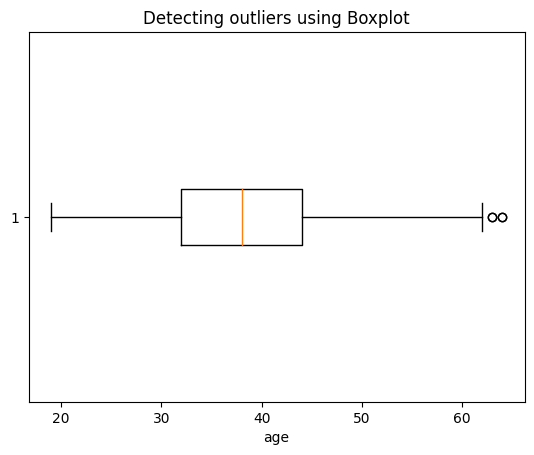

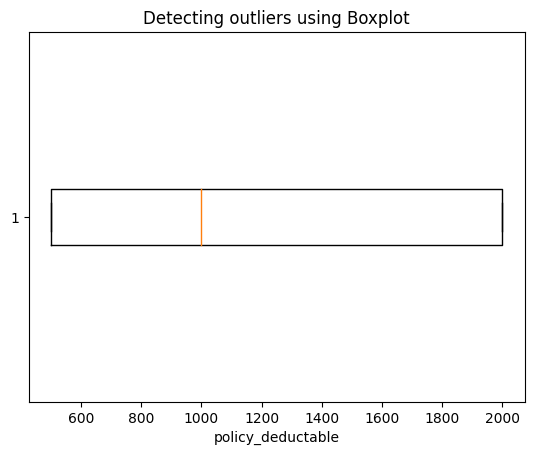

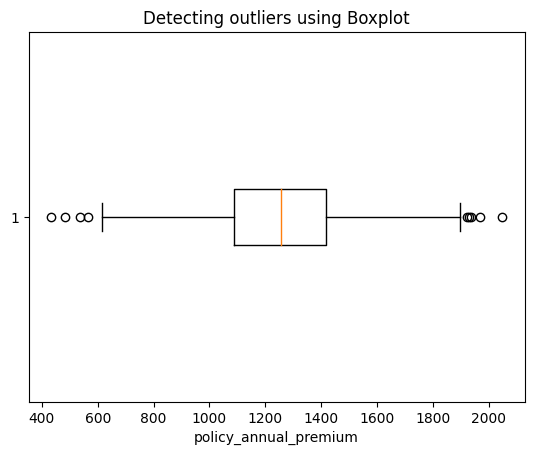

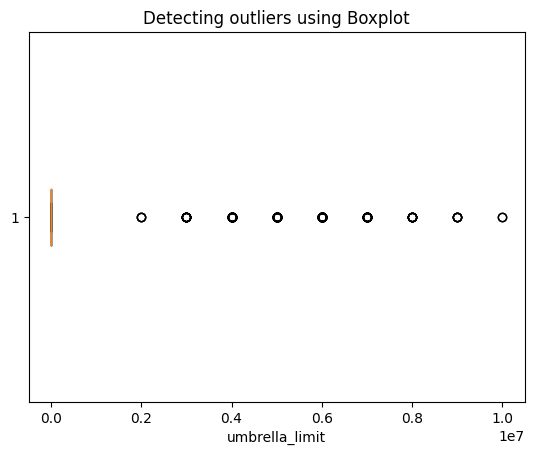

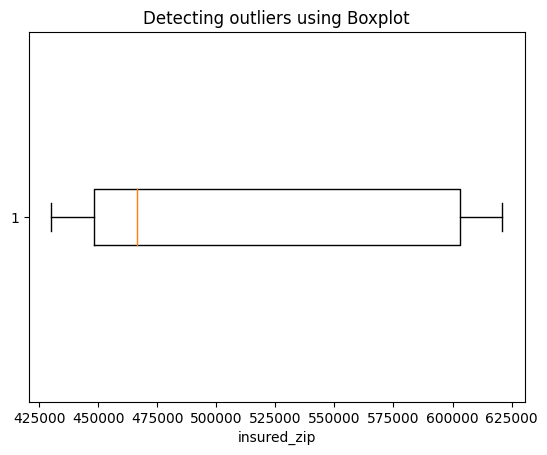

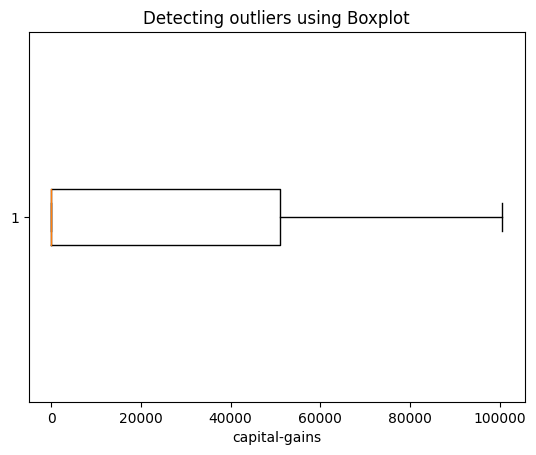

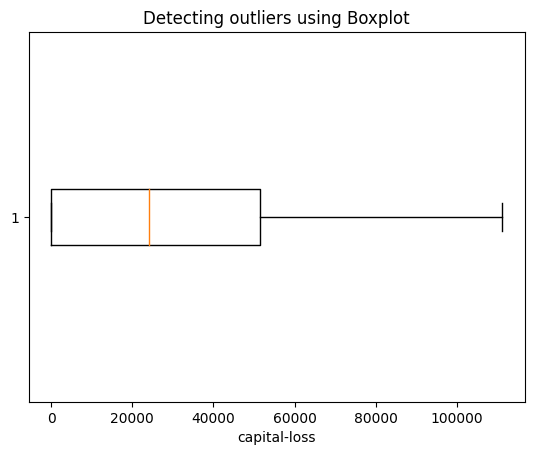

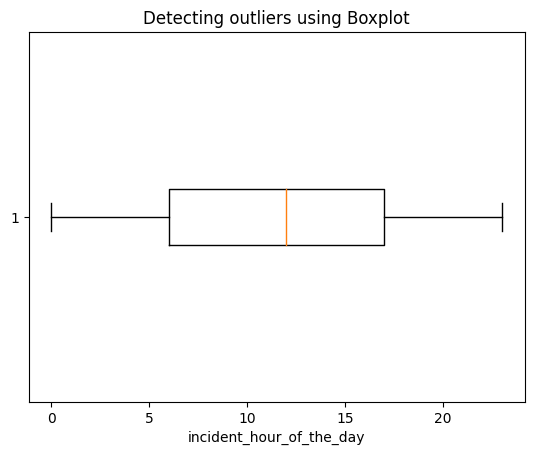

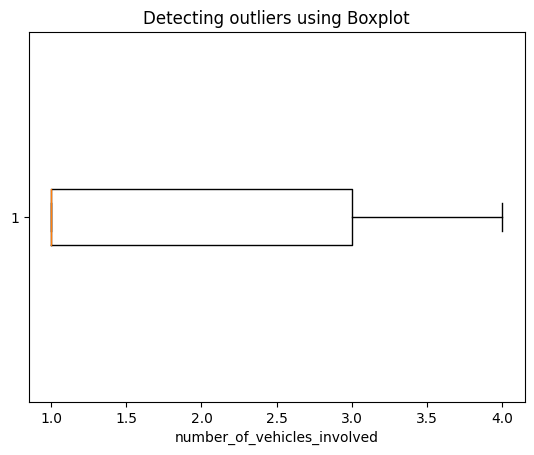

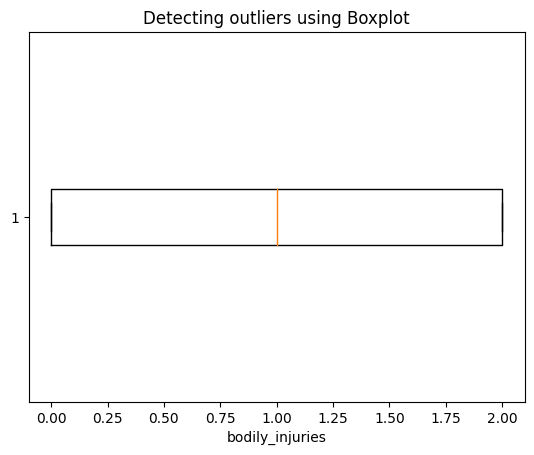

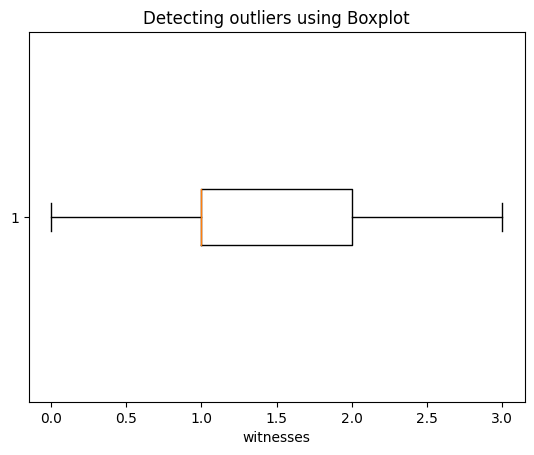

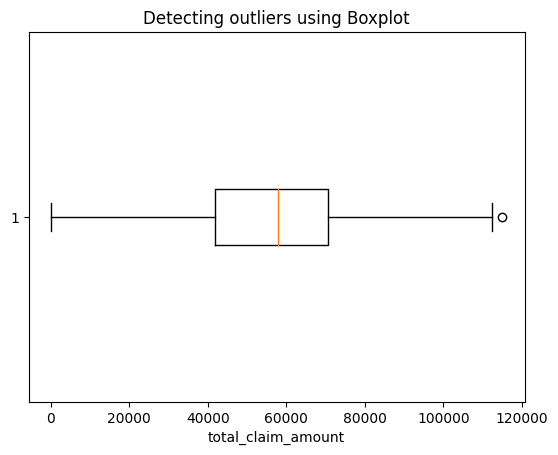

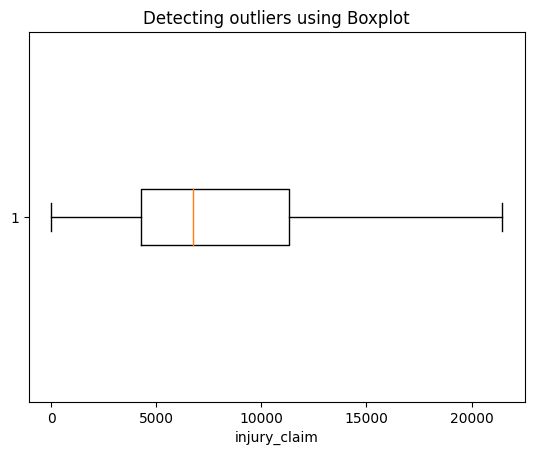

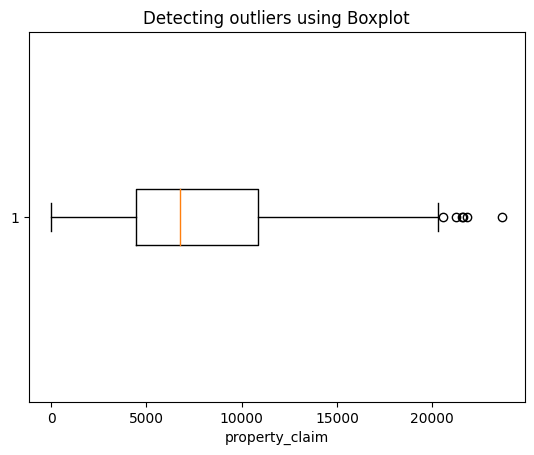

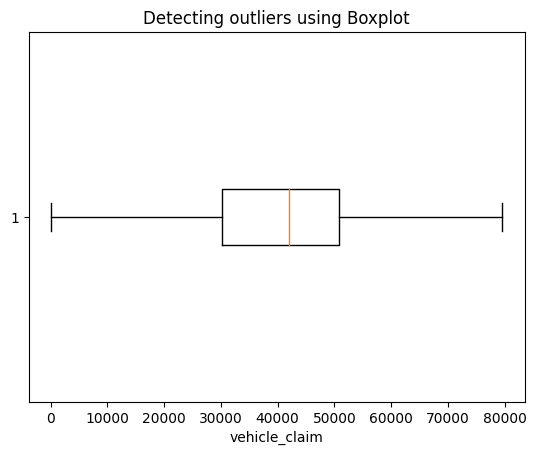

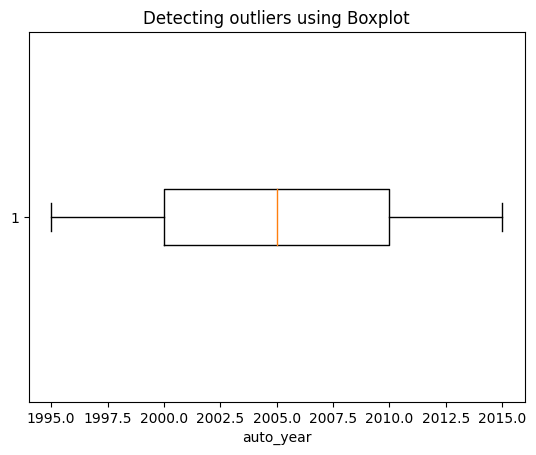

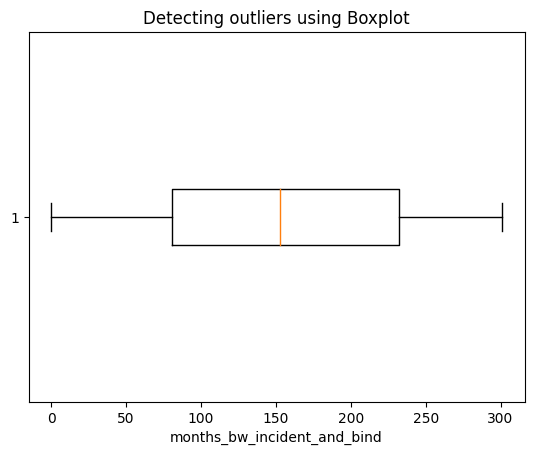

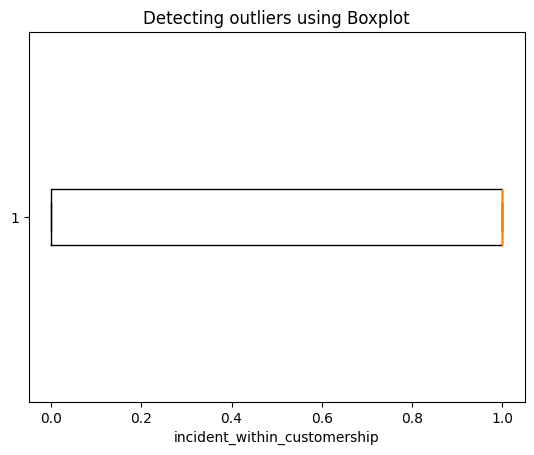

In [11]:
#importing the dependency
import matplotlib.pyplot as plt
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  plt.boxplot(df[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

### Z-score

In [12]:
#creating a function to detect outliers
import numpy as np
outliers = []
def detect_outliers_zscore(data):
  thres = 3
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z_score = (i-mean)/std
    if(np.abs(z_score) > thres):
      outliers.append(i)
  return outliers

### Ways of handling extreme values(outliers):
##### - Trimming/removing the outlier
##### - Quantile based flooring and capping
##### - Mean/Median imputation

### Outliers here are treated as Median imputation as:
##### - The size of dataset is small and trimming outliers would further decrease available information
##### - As the mean value is highly influenced by the outliers, it is practice to replace the outliers with median value

In [13]:
for i in dict(df.dtypes):
  outliers = []
  if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] == 'float64':
    sample_outliers = detect_outliers_zscore(df[i])
    print("Column: ", i)
    print("Outliers from Z-score method: ", sample_outliers)
    if len(sample_outliers) > 0:
      median = np.median(df[i])
      for j in sample_outliers:
        df[i] = np.where(df[i]==j, median, df[i])
    print("After treatment: ")
    outliers = []
    sample_outliers = detect_outliers_zscore(df[i])
    print("Outliers from Z-score method: ", sample_outliers)

Column:  months_as_customer
Outliers from Z-score method:  []
After treatment: 
Outliers from Z-score method:  []
Column:  age
Outliers from Z-score method:  []
After treatment: 
Outliers from Z-score method:  []
Column:  policy_deductable
Outliers from Z-score method:  []
After treatment: 
Outliers from Z-score method:  []
Column:  policy_annual_premium
Outliers from Z-score method:  [2047.59, 433.33, 484.67]
After treatment: 
Outliers from Z-score method:  []
Column:  umbrella_limit
Outliers from Z-score method:  [8000000, 8000000, 9000000, 10000000, 8000000, 8000000, 8000000, 10000000, 9000000, 8000000, 9000000, 9000000, 8000000, 8000000, 9000000]
After treatment: 
Outliers from Z-score method:  []
Column:  insured_zip
Outliers from Z-score method:  []
After treatment: 
Outliers from Z-score method:  []
Column:  capital-gains
Outliers from Z-score method:  []
After treatment: 
Outliers from Z-score method:  []
Column:  capital-loss
Outliers from Z-score method:  [111100]
After treat

### Ways of handling missing data:
##### - deleting the entire row
##### - deleting the entire column
##### - replacing with arbitrary value
##### - replacing with mean
##### - replacing with mode
##### - replacing with median
##### - replacing with previous value -> forward fill
##### - replacing with next value -> backward fill
##### - replacing with the value 'missing', which treats it as a separate category

### Missing values here are treated with Mode Imputation as: Values were missing in categorical columns

In [14]:
df = df.replace("?", np.NaN)
for i in df.columns:
  print("Column: ", i)
  print("Number of nulls: ", df[i].isnull().sum())

Column:  months_as_customer
Number of nulls:  0
Column:  age
Number of nulls:  0
Column:  policy_bind_date
Number of nulls:  0
Column:  policy_state
Number of nulls:  0
Column:  policy_csl
Number of nulls:  0
Column:  policy_deductable
Number of nulls:  0
Column:  policy_annual_premium
Number of nulls:  0
Column:  umbrella_limit
Number of nulls:  0
Column:  insured_zip
Number of nulls:  0
Column:  insured_sex
Number of nulls:  0
Column:  insured_education_level
Number of nulls:  0
Column:  insured_occupation
Number of nulls:  0
Column:  insured_hobbies
Number of nulls:  0
Column:  insured_relationship
Number of nulls:  0
Column:  capital-gains
Number of nulls:  0
Column:  capital-loss
Number of nulls:  0
Column:  incident_date
Number of nulls:  0
Column:  incident_type
Number of nulls:  0
Column:  collision_type
Number of nulls:  178
Column:  incident_severity
Number of nulls:  0
Column:  authorities_contacted
Number of nulls:  0
Column:  incident_state
Number of nulls:  0
Column:  inc

In [15]:
#To distinguish between continuous and categorical columns. High number of unique values in a column indicative of the column being continuos, low number of unique values indicates it is a categorical column
df.nunique()

months_as_customer              391
age                              46
policy_bind_date                950
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           987
umbrella_limit                    7
insured_zip                     994
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    353
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location               999
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries             

In [16]:
#All values in this column are different
df = df.drop('incident_location', axis = 1)

In [17]:
#Missing values here are treated with mode imputation as values were missing in categorical columns
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df.collision_type #checking
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df.property_damage #checking
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df.police_report_available #checking

0      YES
1       NO
2       NO
3       NO
4       NO
      ... 
995     NO
996     NO
997    YES
998    YES
999     NO
Name: police_report_available, Length: 999, dtype: object

### Stepwise feature engineering:
##### - Encoding
##### - Feature Selection
##### - Binning
##### - Feature Scaling

### Steps carried out here:
##### - Encoding
##### - Feature Selection

In [18]:
#Encoding
mappings = {}
for i in dict(df.dtypes):
  if dict(df.dtypes)[i] == 'O':
    mappings[i] = dict(zip(df[i].unique(), range(len(df[i].unique()))))
    df[i] = df[i].map(lambda x: mappings[i][x])
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind,incident_within_customership
0,328,48,2014-10-17,0,0,1000,1406.91,0.0,466132,0,...,71610,6510,13020.0,52080,0,0,2004,0,3,1
1,228,42,2006-06-27,1,0,2000,1197.22,5000000.0,468176,0,...,5070,780,780.0,3510,1,1,2007,0,102,1
2,134,29,2000-09-06,0,1,2000,1413.14,5000000.0,430632,1,...,34650,7700,3850.0,23100,2,2,2007,1,173,0
3,256,41,1990-05-25,2,0,2000,1415.74,6000000.0,608117,1,...,63400,6340,6340.0,50720,3,3,2014,0,295,0
4,228,44,2014-06-06,2,2,1000,1583.91,6000000.0,610706,0,...,6500,1300,650.0,4550,4,4,2009,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,0,2,1000,1310.80,0.0,431289,1,...,87200,17440,8720.0,61040,12,31,2006,1,283,0
996,285,41,2014-01-05,2,1,1000,1436.79,0.0,608177,1,...,108480,18080,18080.0,72320,13,27,2015,1,12,1
997,130,34,2003-02-17,0,0,500,1383.49,3000000.0,442797,1,...,67500,7500,7500.0,52500,9,17,1996,1,143,0
998,458,62,2011-11-18,2,2,2000,1356.92,5000000.0,441714,0,...,46980,5220,5220.0,36540,6,7,1998,1,39,1


<ipython-input-19-94962a1c2b52>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


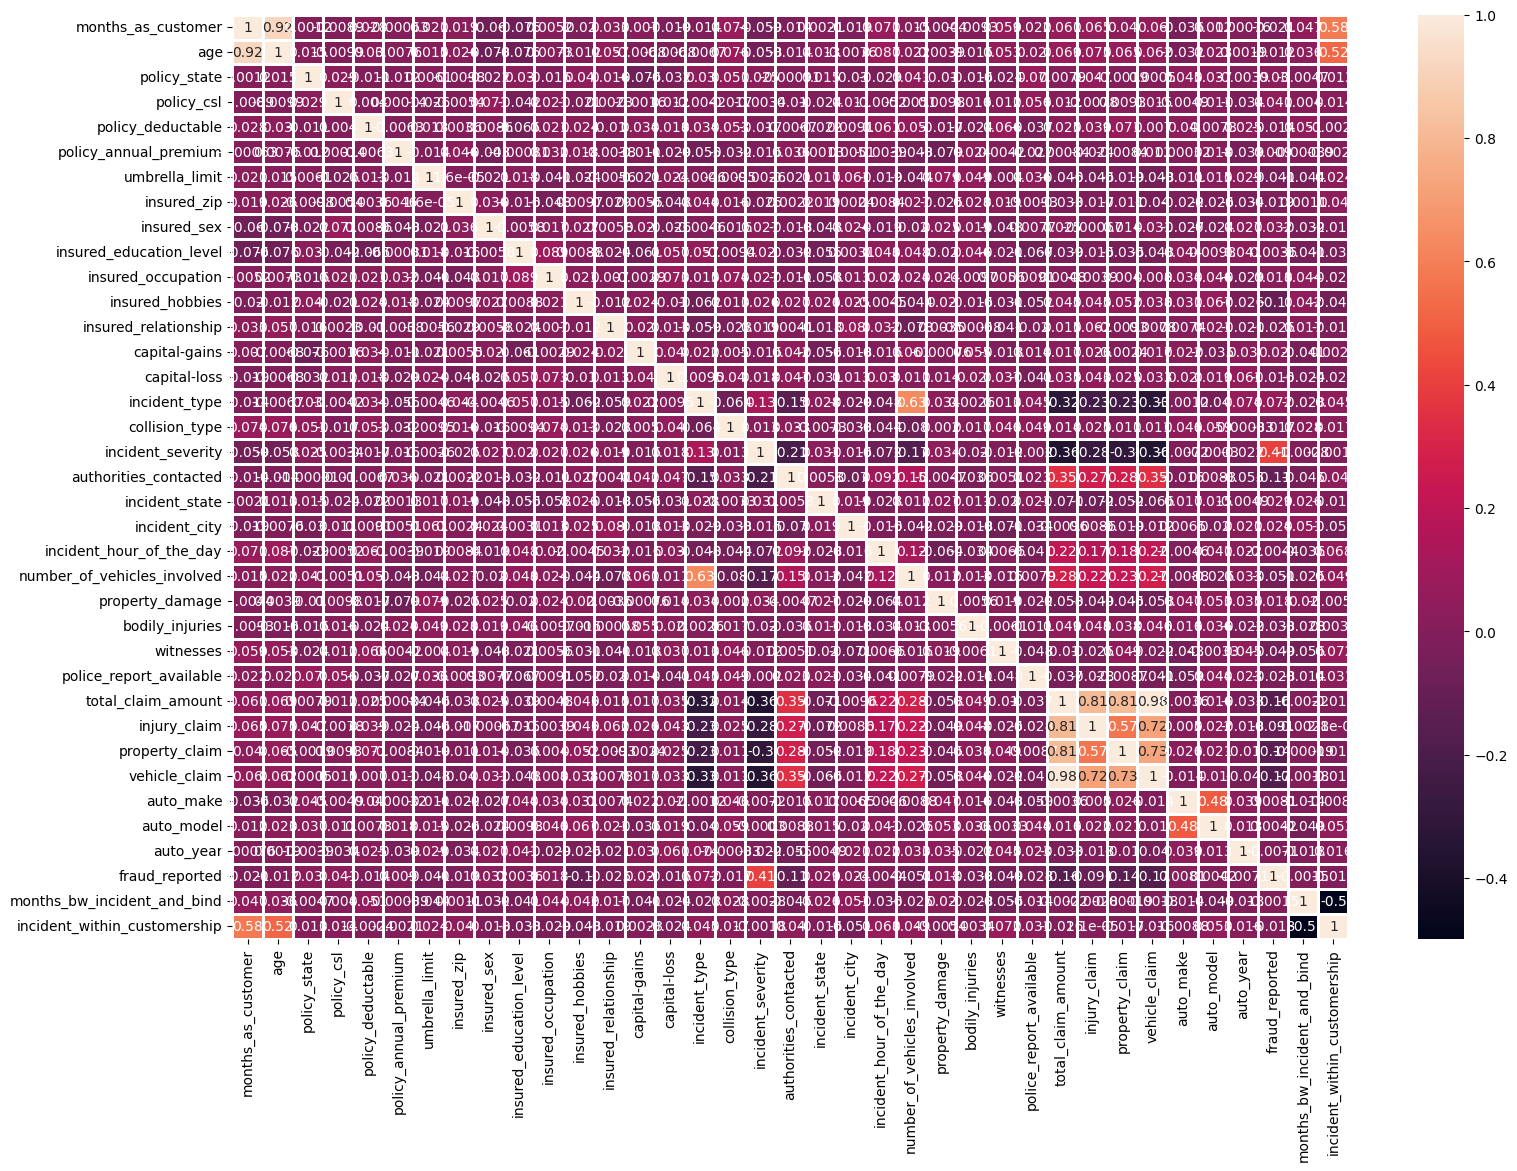

In [19]:
#Feature Selection
import seaborn as sns
plt.figure(figsize = (18,12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt ='.2g', linewidth = 1)
plt.show()

In [20]:
df = df.drop('vehicle_claim', axis = 1) #as its correlation with another feature (total_claim_amount) > 95%. Keeping multiple strongly correlated featured would make the collection of such features influential.
df = df.drop(['policy_bind_date', 'incident_date'], axis = 1) #as information from these features has been exported to new derived features

In [21]:
y = df['fraud_reported']
x = df.drop('fraud_reported', axis = 1)

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pandas as pd

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.02598217 0.02526299 0.02148984 0.02169369 0.02222286 0.02806444
 0.01819653 0.02818294 0.01696772 0.02744473 0.02795348 0.03856768
 0.02587614 0.02203014 0.02534453 0.01753595 0.01972431 0.16550915
 0.02513363 0.02856507 0.02772172 0.0265877  0.01640915 0.01707422
 0.02205098 0.02361386 0.01742404 0.0331781  0.02952958 0.03094763
 0.02706574 0.02563746 0.02712794 0.02646824 0.01741564]


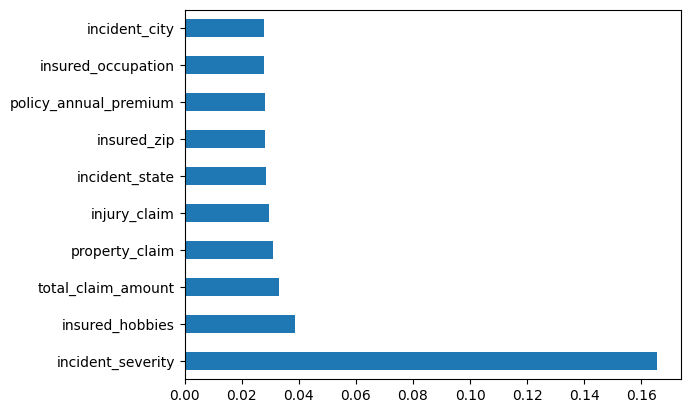

In [23]:
#Finding 10 Most important features
feature_importances = pd.Series(model.feature_importances_, index = x.columns)
feature_importances.nlargest(10).plot(kind = 'barh')
plt.show()

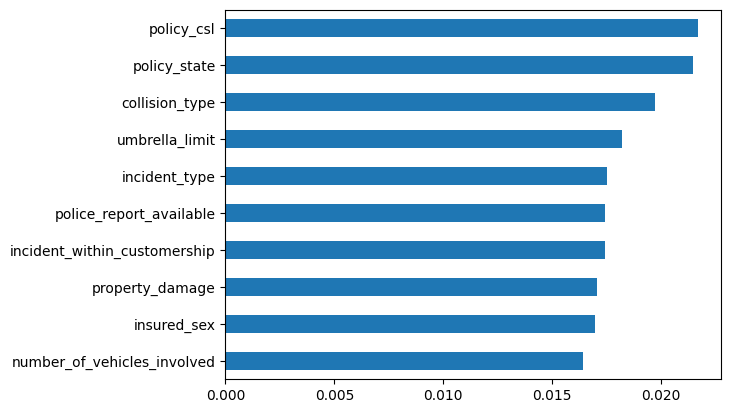

In [24]:
#Finding 10 Least important features
feature_importances.nsmallest(10).plot(kind = 'barh')
plt.show()

In [25]:
#Not select columns with importance < 0.02
df = df.drop(['collision_type','property_damage', 'incident_within_customership', 'insured_sex', 'umbrella_limit', 'number_of_vehicles_involved', 'police_report_available', 'incident_type'], axis = 1)

In [26]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind
0,328,48,0,0,1000,1406.91,466132,0,0,0,...,1,2,71610,6510,13020.0,0,0,2004,0,3
1,228,42,1,0,2000,1197.22,468176,0,1,1,...,0,0,5070,780,780.0,1,1,2007,0,102
2,134,29,0,1,2000,1413.14,430632,1,2,2,...,2,3,34650,7700,3850.0,2,2,2007,1,173
3,256,41,2,0,2000,1415.74,608117,1,3,2,...,1,2,63400,6340,6340.0,3,3,2014,0,295
4,228,44,2,2,1000,1583.91,610706,2,2,2,...,0,1,6500,1300,650.0,4,4,2009,1,8


# Data Analysis and Visualization

In [27]:
#getting the statistical info of the dataset
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,203.873874,38.944945,0.986987,0.948949,1136.636637,1257.130270,501277.587588,3.061061,6.075075,9.265265,...,0.992993,1.487487,52720.500501,7432.292292,7372.902903,6.319319,18.039039,2005.112112,0.752753,155.120120
std,115.142928,9.144354,0.830790,0.806037,611.839681,240.348418,71709.740537,2.010313,3.950263,5.703663,...,0.819936,1.111785,26382.199299,4883.266266,4789.685246,3.994628,11.310585,6.011966,0.431628,88.271305
min,0.000000,19.000000,0.000000,0.000000,500.000000,538.170000,430104.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,1995.000000,0.000000,0.000000
25%,115.500000,32.000000,0.000000,0.000000,500.000000,1090.485000,448451.000000,1.000000,3.000000,4.000000,...,0.000000,1.000000,41775.000000,4290.000000,4440.000000,3.000000,8.000000,2000.000000,1.000000,81.000000
50%,199.000000,38.000000,1.000000,1.000000,1000.000000,1257.040000,466498.000000,3.000000,6.000000,9.000000,...,1.000000,1.000000,57970.000000,6770.000000,6750.000000,6.000000,17.000000,2005.000000,1.000000,153.000000
75%,276.000000,44.000000,2.000000,2.000000,2000.000000,1415.210000,603254.000000,5.000000,9.000000,14.000000,...,2.000000,2.000000,70550.000000,11310.000000,10860.000000,10.000000,27.000000,2010.000000,1.000000,232.000000
max,479.000000,64.000000,2.000000,2.000000,2000.000000,1969.630000,620962.000000,6.000000,13.000000,19.000000,...,2.000000,3.000000,114920.000000,21450.000000,21810.000000,13.000000,38.000000,2015.000000,1.000000,301.000000


In [28]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'insured_zip',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'auto_make', 'auto_model', 'auto_year', 'fraud_reported',
       'months_bw_incident_and_bind'],
      dtype='object')

### Visualization (Target vs Independent Features):
#### - Distribution of frauds and non-frauds (target) across top 10 most important features

In [29]:
print(mappings['fraud_reported'])
print("YES: ", y[y == 0].shape[0])
print("NO: ", y[y == 1].shape[0])

{'Y': 0, 'N': 1}
YES:  247
NO:  752


fraud_reported :  {'Y': 0, 'N': 1}
incident_severity :  {'Major Damage': 0, 'Minor Damage': 1, 'Total Loss': 2, 'Trivial Damage': 3}
fraud_reported       0    1
incident_severity          
0                  167  108
1                   38  316
2                   36  244
3                    6   84

fraud_reported :  {'Y': 0, 'N': 1}
insured_hobbies :  {'sleeping': 0, 'reading': 1, 'board-games': 2, 'bungie-jumping': 3, 'base-jumping': 4, 'golf': 5, 'camping': 6, 'dancing': 7, 'skydiving': 8, 'movies': 9, 'hiking': 10, 'yachting': 11, 'paintball': 12, 'chess': 13, 'kayaking': 14, 'polo': 15, 'basketball': 16, 'video-games': 17, 'cross-fit': 18, 'exercise': 19}
fraud_reported    0   1
insured_hobbies        
0                 8  33
1                17  47
2                14  34
3                 9  47
4                13  36
5                 6  49
6                 5  50
7                 5  38
8                11  38
9                 9  46
10               12  40
11               1

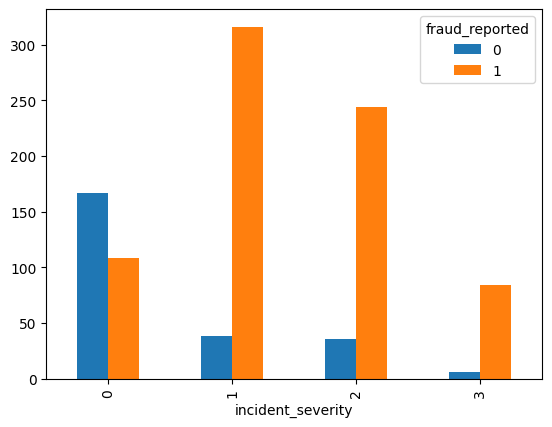

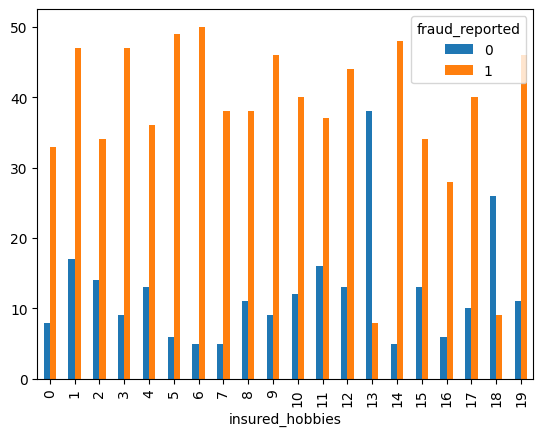

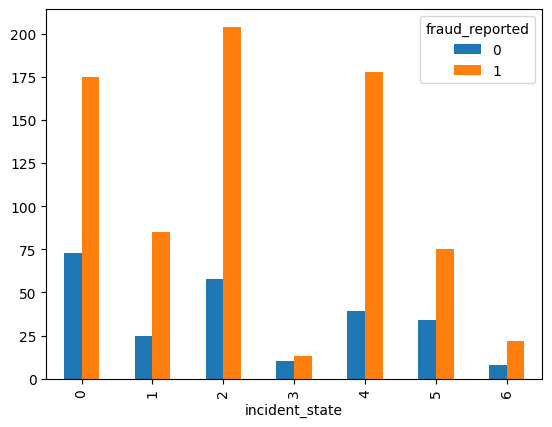

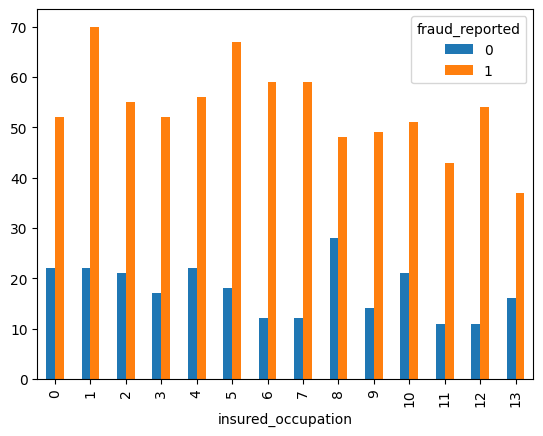

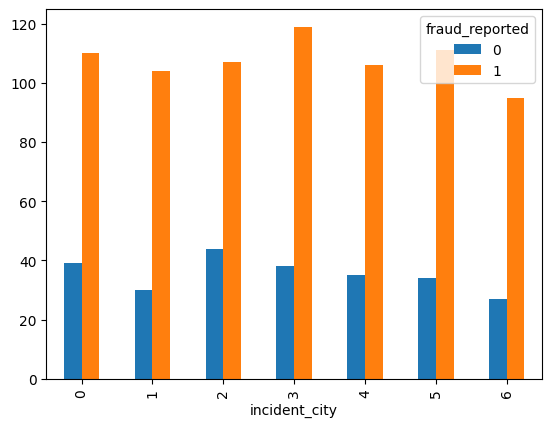

In [30]:
for i in dict(feature_importances.nlargest(10)):
 if i in mappings:
  chart = pd.crosstab(index=df[i],columns=df['fraud_reported'])
  print('fraud_reported' + ' : ', mappings['fraud_reported'])
  print(i + ' : ', mappings[i])
  print(chart)
  print()
  chart.plot.bar()

### Analysis:
#### For each of these features,

#### for each category,

#### the difference between number of frauds and non-frauds are significant. Therefore these become very important indicators of fraud/non-fraud predictions.

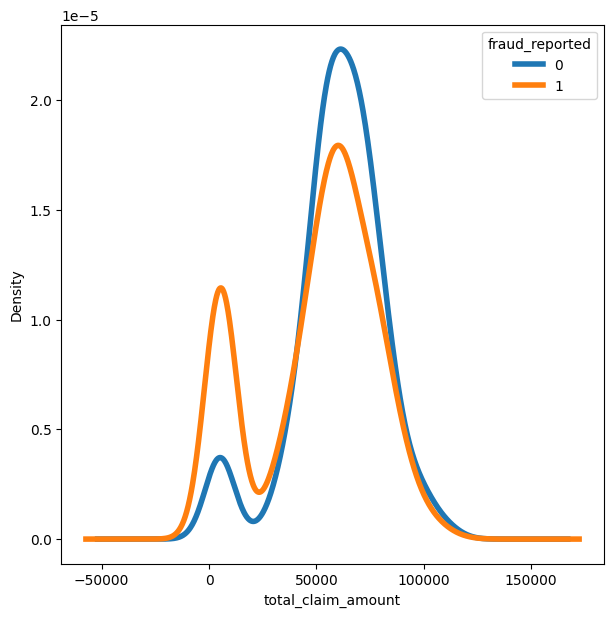

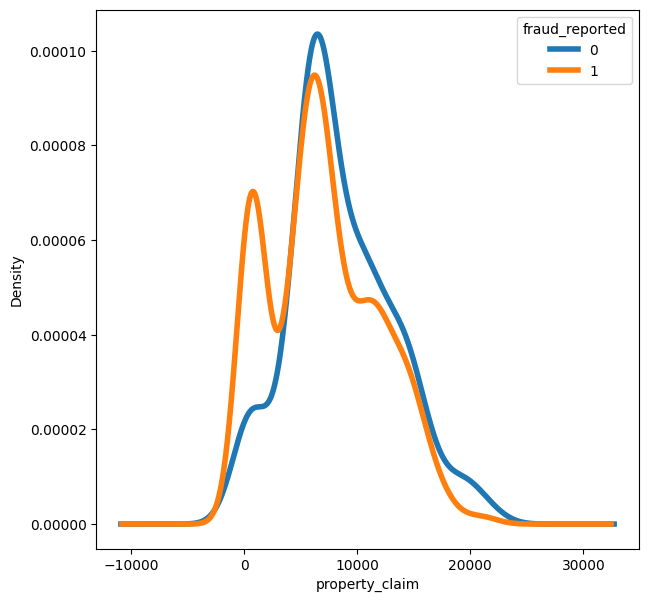

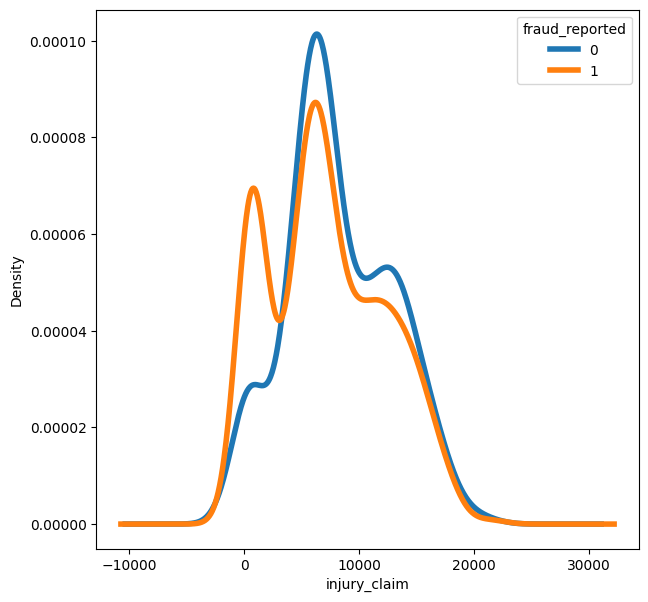

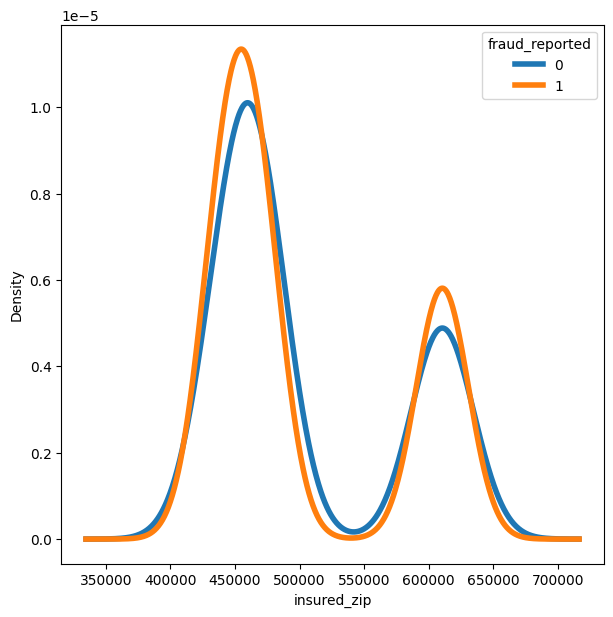

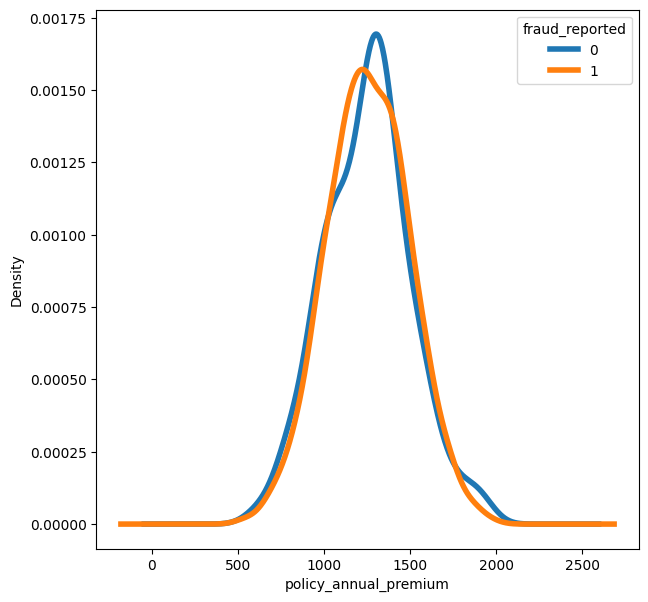

In [31]:
for i in dict(feature_importances.nlargest(10)):
 if i not in mappings:
  df_specific_column = df.pivot(columns = 'fraud_reported', values = i)
  df_specific_column.plot.density(figsize = (7, 7), linewidth = 4)
  plt.xlabel(i)


### Analysis:

#### For each of these features,

#### curve for fraud and non-fraud hardly overlap for any value/range of values. Therefore, for a data point of that feature, it mostly indicates to a definite target value.

#### This makes these features important indicators for fraud/non-fraud prediction.

# Explanatory Model Building

In [32]:
from sklearn.model_selection import train_test_split
y = df['fraud_reported']
x = df.drop('fraud_reported', axis = 1)
Train, Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=42)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
model = LogisticRegression()
model = model.fit(Train, Y_Train)
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.76

 clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.76      1.00      0.86       152

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.58      0.76      0.66       200


 confussion matrix:
 [[  0  48]
 [  0 152]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

## K Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model = model.fit(Train, Y_Train)
pred = model.predict(Test.values)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.74

 clasification report:
               precision    recall  f1-score   support

           0       0.38      0.12      0.19        48
           1       0.77      0.93      0.85       152

    accuracy                           0.74       200
   macro avg       0.57      0.53      0.52       200
weighted avg       0.68      0.74      0.69       200


 confussion matrix:
 [[  6  42]
 [ 10 142]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model = model.fit(Train, Y_Train)
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.735

 clasification report:
               precision    recall  f1-score   support

           0       0.35      0.12      0.18        48
           1       0.77      0.93      0.84       152

    accuracy                           0.73       200
   macro avg       0.56      0.53      0.51       200
weighted avg       0.67      0.73      0.68       200


 confussion matrix:
 [[  6  42]
 [ 11 141]]


## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(Train, Y_Train)
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.755

 clasification report:
               precision    recall  f1-score   support

           0       0.49      0.69      0.57        48
           1       0.89      0.78      0.83       152

    accuracy                           0.76       200
   macro avg       0.69      0.73      0.70       200
weighted avg       0.79      0.76      0.77       200


 confussion matrix:
 [[ 33  15]
 [ 34 118]]


## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(Train, Y_Train)
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.79

 clasification report:
               precision    recall  f1-score   support

           0       0.57      0.54      0.55        48
           1       0.86      0.87      0.86       152

    accuracy                           0.79       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.79      0.79      0.79       200


 confussion matrix:
 [[ 26  22]
 [ 20 132]]


## XGBoost

In [38]:
!pip install xgboost

In [39]:
from xgboost import XGBClassifier
model = XGBClassifier()
model = model.fit(Train, Y_Train)
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.8

 clasification report:
               precision    recall  f1-score   support

           0       0.58      0.62      0.60        48
           1       0.88      0.86      0.87       152

    accuracy                           0.80       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.81      0.80      0.80       200


 confussion matrix:
 [[ 30  18]
 [ 22 130]]


### So, XGBoost Classifier is the best performing model. We now analyze and explain feature effects on model performance, keeping XGB Classifier as the selected model.

#### Main and Interaction effects:

In [40]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.8 MB/s eta 0:00:00


[16:14:51] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5]),
 [Text(0, 0.5, 'months_as_customer'),
  Text(0, 1.5, 'age'),
  Text(0, 2.5, 'policy_state'),
  Text(0, 3.5, 'policy_csl'),
  Text(0, 4.5, 'policy_deductable'),
  Text(0, 5.5, 'policy_annual_premium'),
  Text(0, 6.5, 'insured_zip'),
  Text(0, 7.5, 'insured_education_level'),
  Text(0, 8.5, 'insured_occupation'),
  Text(0, 9.5, 'insured_hobbies'),
  Text(0, 10.5, 'insured_relationship'),
  Text(0, 11.5, 'capital-gains'),
  Text(0, 12.5, 'capital-loss'),
  Text(0, 13.5, 'incident_severity'),
  Text(0, 14.5, 'authorities_contacted'),
  Text(0, 15.5, 'incident_state'),
  Text(0, 16.5, 'incident_city'),
  Text(0, 17.5, 'incident_hour_of_the_day'),
  Text(0, 18.5, 'bodily_injuries'),
  Text(0, 19.5, 'witnesses'),
  Text(0, 20.5, 'total_claim_amount'),
  Text(0, 21.5, 'injury_claim'),
  Text(0, 22.5, 'propert

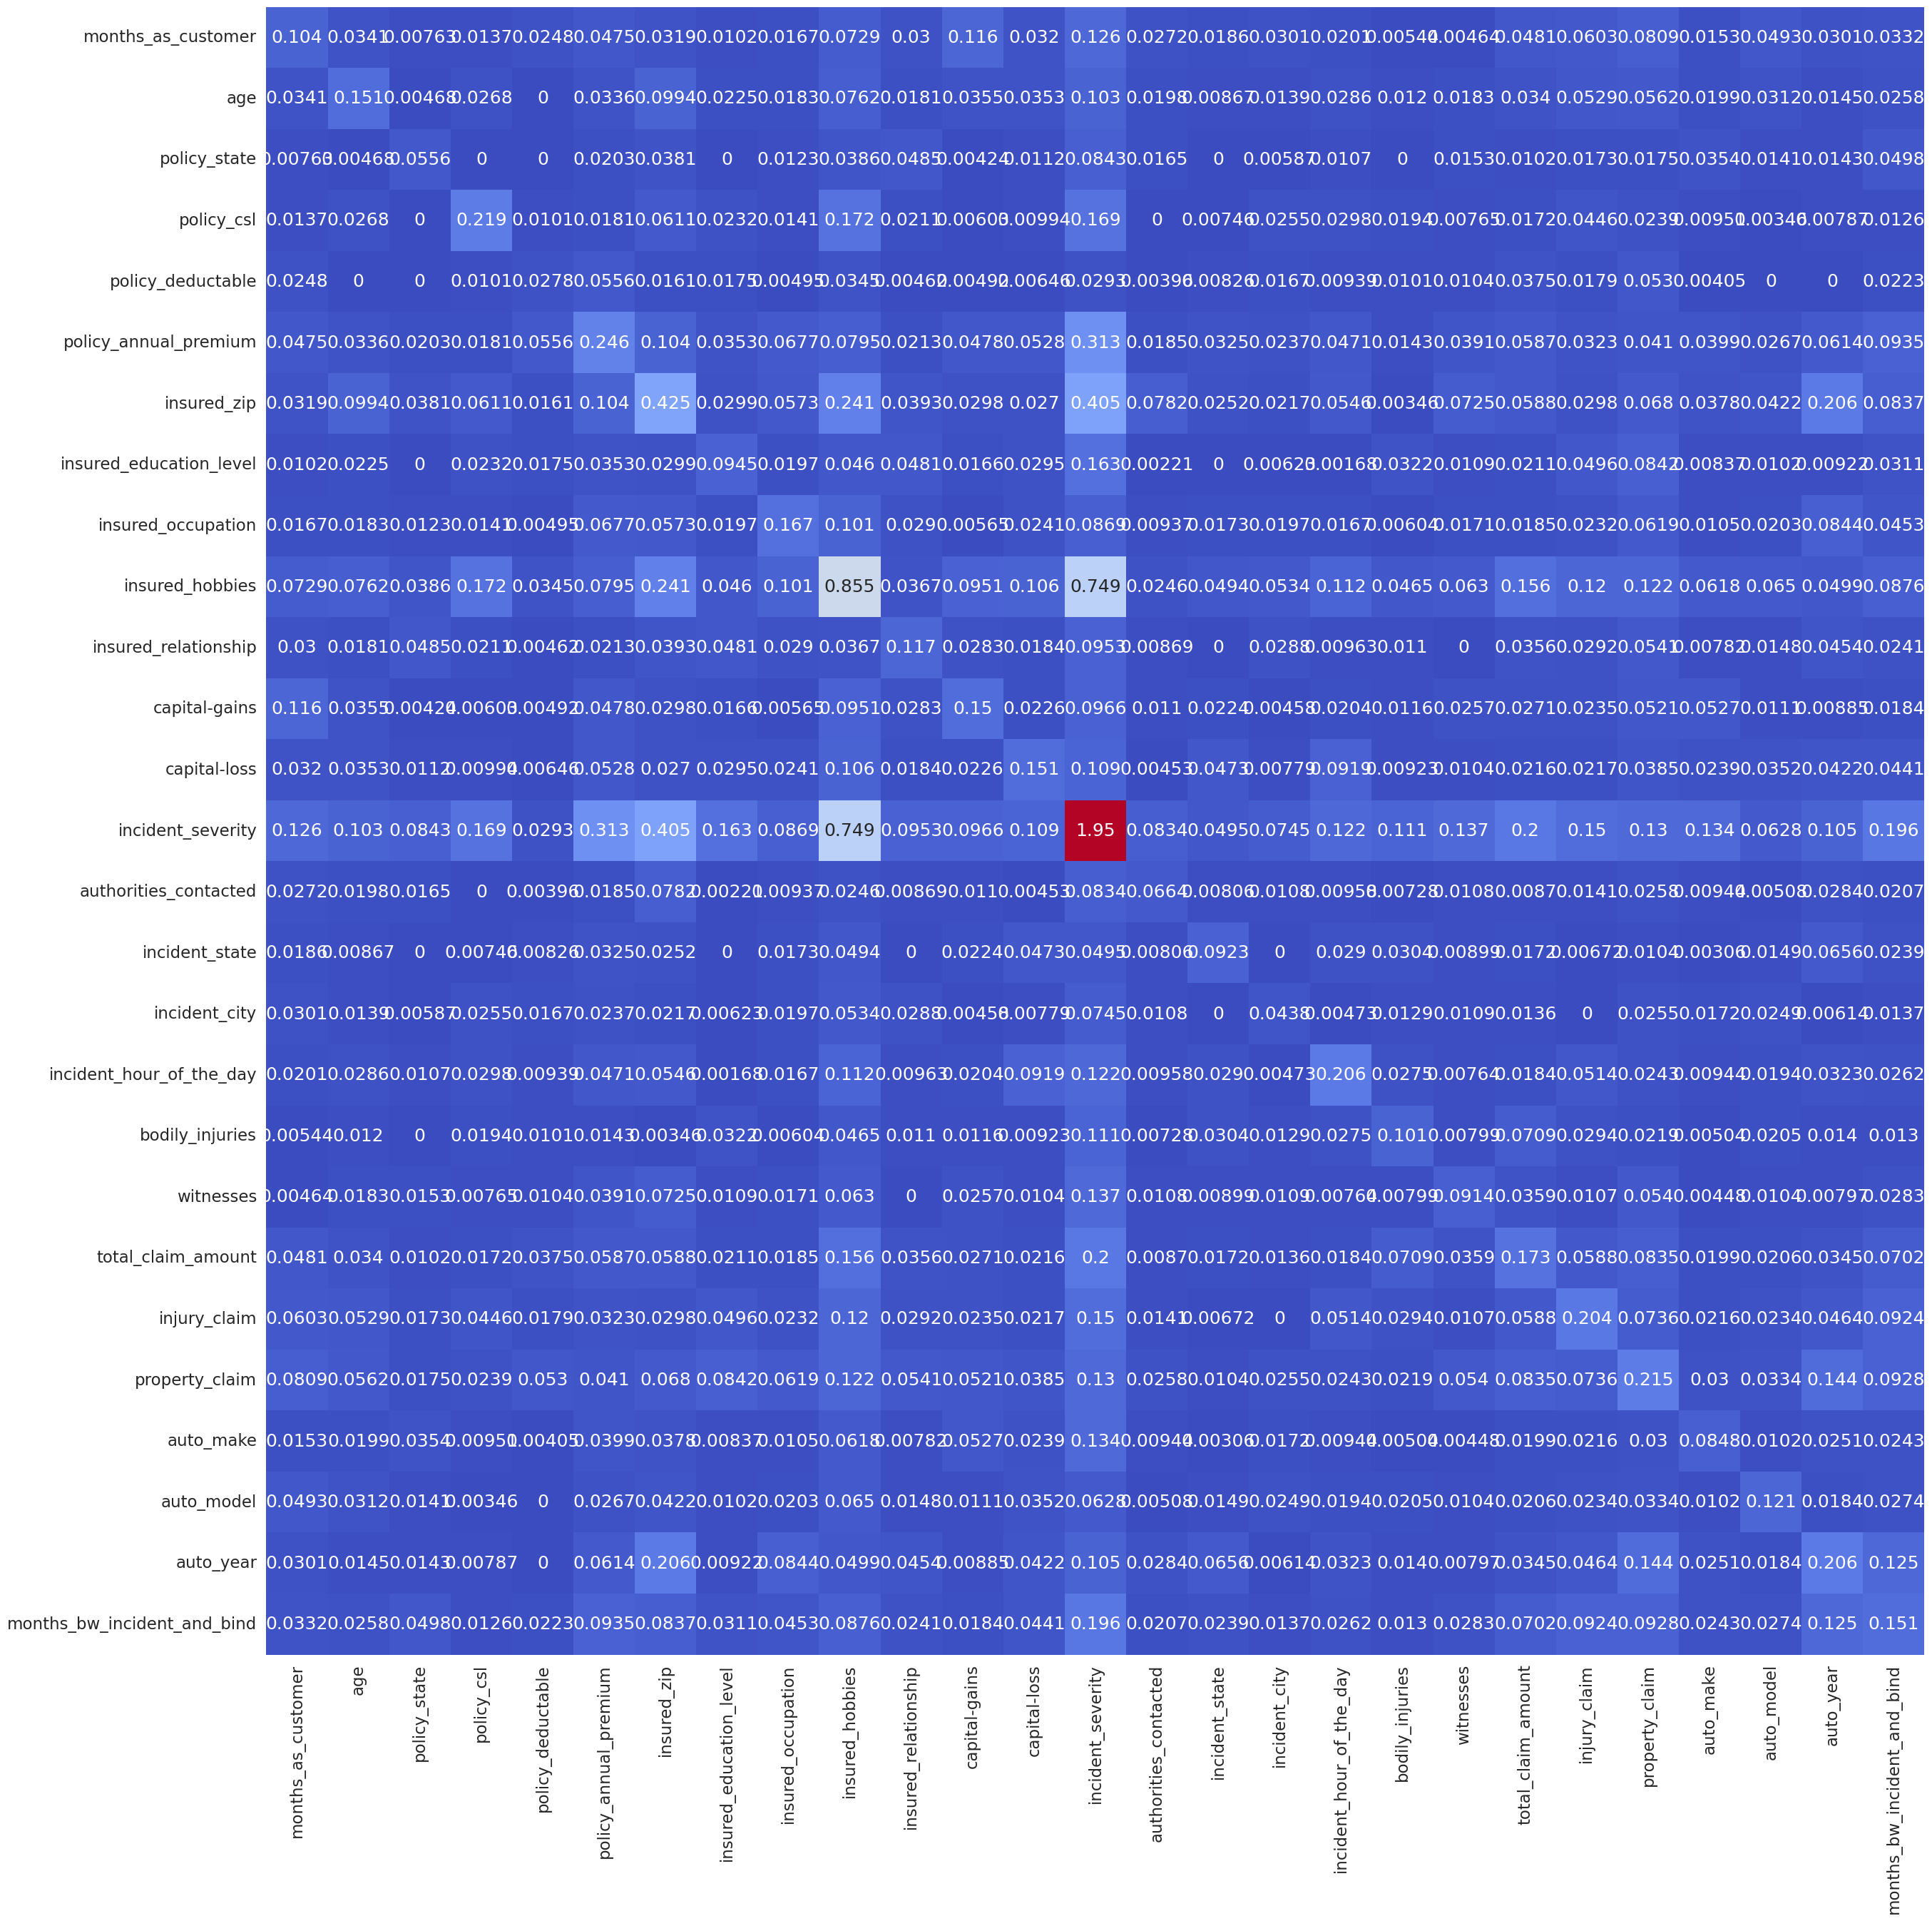

In [41]:
import seaborn as sns
import xgboost as xgb
import shap
shap.initjs()
#Explanatory model
model = xgb.XGBClassifier()

model = model.fit(x, y)
explainer = shap.TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(x)
#Main and interaction effect scores
mean_shap = np.abs(shap_interaction).mean(0)
matrix = pd.DataFrame(mean_shap,index=x.columns,columns=x.columns)
matrix.where(matrix.values == np.diagonal(matrix),matrix.values*2,inplace=True)
plt.figure(figsize=(30, 30), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(matrix,cmap='coolwarm',annot=True,fmt='.3g',cbar=False)
plt.yticks(rotation=0)

### Features having most significant main and interaction effect on fraud:

### incident_severity
### insured_hobbies
### (Considering scores > 0.2 from the above heatmap)

### Other features having significant main and interaction effect on fraud with scores < 0.2 on heatmap are also found in plots below

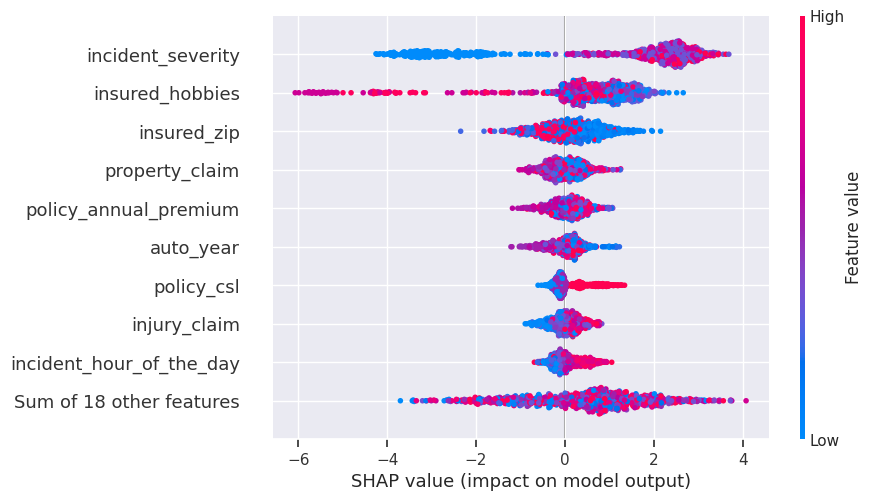

In [42]:
#Plot showing main effect
shap_values = explainer(x)
shap.plots.beeswarm(shap_values)

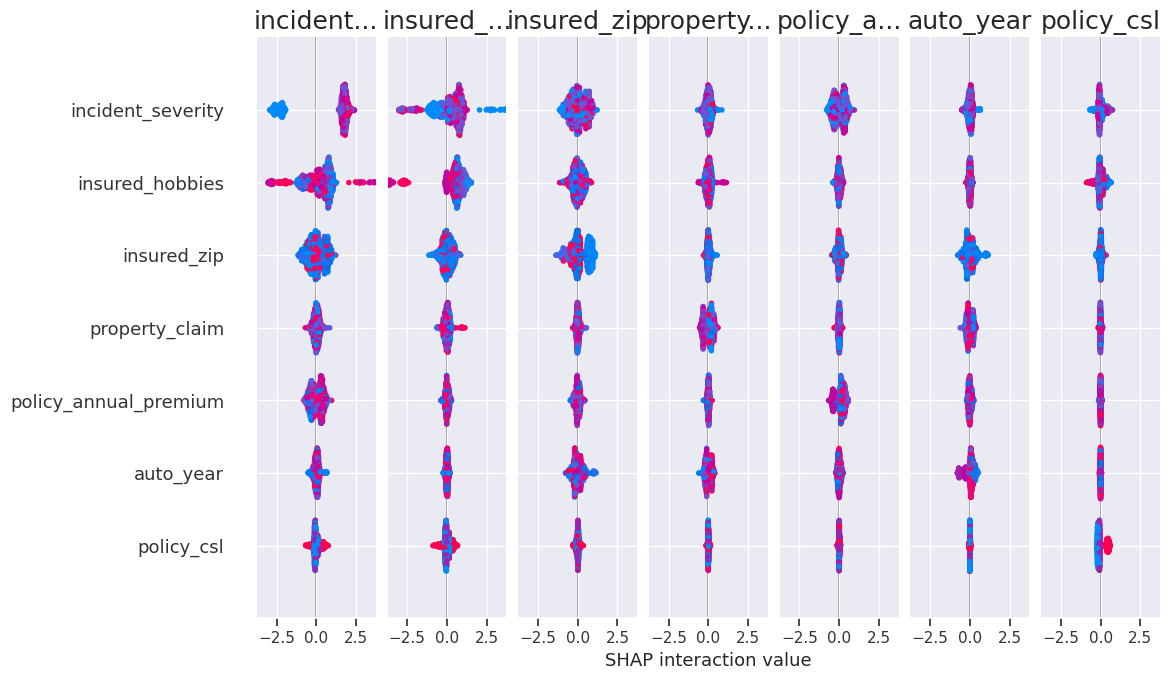

In [43]:
#Plots showing main and interaction effects
shap.summary_plot(shap_interaction, x)

## Odds Ratios

#### (for most significant categorical features)

#### For each of the categories (in each feature) shown below,

#### In cases where odd ratio > 1, the presence of data point in that category increases the odds of it being fraud
#### In cases where odd ratio < 1, the absence of data point in that category increases the odds of it being fraud

In [44]:
#Expected Odds Ratios
from scipy import stats
for c in dict(feature_importances.nlargest(10)):
 if c in mappings:
  print()
  print (c, " : ",mappings[c], '\n')
  for i in mappings[c].values():
   table = np.array([[df[df[c] == i]['fraud_reported'].value_counts()[0], df[df[c] == i]['fraud_reported'].value_counts()[1]], [df[df[c] != i]['fraud_reported'].value_counts()[0], df[df[c] != i]['fraud_reported'].value_counts()[1]]])
   print (c, " = ", i)
   print (table)
   oddsratio = stats.fisher_exact(table)
   print("Odds Ratio: ", oddsratio[0])


incident_severity  :  {'Major Damage': 0, 'Minor Damage': 1, 'Total Loss': 2, 'Trivial Damage': 3} 

incident_severity  =  0
[[167 108]
 [ 80 644]]
Odds Ratio:  12.447685185185184
incident_severity  =  1
[[ 38 316]
 [209 436]]
Odds Ratio:  0.2508630609896433
incident_severity  =  2
[[ 36 244]
 [211 508]]
Odds Ratio:  0.35521715484422345
incident_severity  =  3
[[  6  84]
 [241 668]]
Odds Ratio:  0.1979845880260818

insured_hobbies  :  {'sleeping': 0, 'reading': 1, 'board-games': 2, 'bungie-jumping': 3, 'base-jumping': 4, 'golf': 5, 'camping': 6, 'dancing': 7, 'skydiving': 8, 'movies': 9, 'hiking': 10, 'yachting': 11, 'paintball': 12, 'chess': 13, 'kayaking': 14, 'polo': 15, 'basketball': 16, 'video-games': 17, 'cross-fit': 18, 'exercise': 19} 

insured_hobbies  =  0
[[  8  33]
 [239 719]]
Odds Ratio:  0.7293013820210473
insured_hobbies  =  1
[[ 17  47]
 [230 705]]
Odds Ratio:  1.108695652173913
insured_hobbies  =  2
[[ 14  34]
 [233 718]]
Odds Ratio:  1.2688714970966928
insured_hobbie

In [45]:
pred = model.predict(x)
df['pred'] = pred
#Observed Odds Ratios
for c in dict(feature_importances.nlargest(10)):
 if c in mappings:
  print()
  print (c, " : ",mappings[c], '\n')
  for i in mappings[c].values():
   table = np.array([[df[df[c] == i]['pred'].value_counts()[0], df[df[c] == i]['pred'].value_counts()[1]], [df[df[c] != i]['pred'].value_counts()[0], df[df[c] != i]['pred'].value_counts()[1]]])
   print (c, " = ", i)
   print (table)
   oddsratio = stats.fisher_exact(table)
   print("Odds Ratio: ", oddsratio[0])


incident_severity  :  {'Major Damage': 0, 'Minor Damage': 1, 'Total Loss': 2, 'Trivial Damage': 3} 

incident_severity  =  0
[[167 108]
 [ 80 644]]
Odds Ratio:  12.447685185185184
incident_severity  =  1
[[ 38 316]
 [209 436]]
Odds Ratio:  0.2508630609896433
incident_severity  =  2
[[ 36 244]
 [211 508]]
Odds Ratio:  0.35521715484422345
incident_severity  =  3
[[  6  84]
 [241 668]]
Odds Ratio:  0.1979845880260818

insured_hobbies  :  {'sleeping': 0, 'reading': 1, 'board-games': 2, 'bungie-jumping': 3, 'base-jumping': 4, 'golf': 5, 'camping': 6, 'dancing': 7, 'skydiving': 8, 'movies': 9, 'hiking': 10, 'yachting': 11, 'paintball': 12, 'chess': 13, 'kayaking': 14, 'polo': 15, 'basketball': 16, 'video-games': 17, 'cross-fit': 18, 'exercise': 19} 

insured_hobbies  =  0
[[  8  33]
 [239 719]]
Odds Ratio:  0.7293013820210473
insured_hobbies  =  1
[[ 17  47]
 [230 705]]
Odds Ratio:  1.108695652173913
insured_hobbies  =  2
[[ 14  34]
 [233 718]]
Odds Ratio:  1.2688714970966928
insured_hobbie

# Predictive Model Building
### Metrics and Methods used to evaluate performance:

##### Precision
##### Recall
##### F1 Score
##### Accuracy (Less important as dataset is imbalanced)
##### AUC under ROC Curve

## Training XGBoost on imbalanced data
### Improvement by hyperparameter optimization

##### Choice of hyperparameters: Found optimal hyperparameters for XGBoost by GridCV Search

In [46]:
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5], 'n_estimators': [100, 500, 1000], 'colsample_bytree': [0.3, 0.7, 1], 'subsample': [0.3, 0.7, 1],}
xgbC = XGBClassifier()
optimize_model = GridSearchCV(estimator=xgbC, param_grid=params, scoring='neg_mean_squared_error', verbose=1)
optimize_model.fit(x, y)
print("Best parameters: ", optimize_model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters:  {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000, 'subsample': 1}


In [49]:
from xgboost import XGBClassifier
model = XGBClassifier(colsample_bytree = 1, learning_rate = 0.01, max_depth = 10, n_estimators = 1000, subsample = 1)
model = model.fit(Train, Y_Train)
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.81

 clasification report:
               precision    recall  f1-score   support

           0       0.58      0.73      0.65        48
           1       0.91      0.84      0.87       152

    accuracy                           0.81       200
   macro avg       0.75      0.78      0.76       200
weighted avg       0.83      0.81      0.82       200


 confussion matrix:
 [[ 35  13]
 [ 25 127]]


### Improvement by finding optimal threshold from ROC Curve

[0.         0.00657895 0.375      0.375      0.41447368 0.41447368
 0.53947368 0.53947368 0.60526316 0.60526316 0.75657895 0.75657895
 0.78947368 0.78947368 0.82236842 0.82236842 0.82894737 0.82894737
 0.83552632 0.83552632 0.84210526 0.84210526 0.85526316 0.85526316
 0.86184211 0.86184211 0.875      0.875      0.88157895 0.88157895
 0.89473684 0.89473684 0.90131579 0.90131579 0.90789474 0.90789474
 0.91447368 0.91447368 0.92105263 0.92105263 0.93421053 0.93421053
 0.94736842 0.94736842 0.95394737 0.95394737 0.96052632 0.96052632
 0.96710526 0.96710526 0.97368421 0.97368421 0.98684211 0.98684211
 0.99342105 0.99342105 1.        ]
[0.         0.         0.         0.04166667 0.04166667 0.0625
 0.0625     0.08333333 0.08333333 0.10416667 0.10416667 0.125
 0.125      0.14583333 0.14583333 0.1875     0.1875     0.20833333
 0.20833333 0.29166667 0.29166667 0.3125     0.3125     0.35416667
 0.35416667 0.45833333 0.45833333 0.47916667 0.47916667 0.5625
 0.5625     0.58333333 0.58333333 0.6041

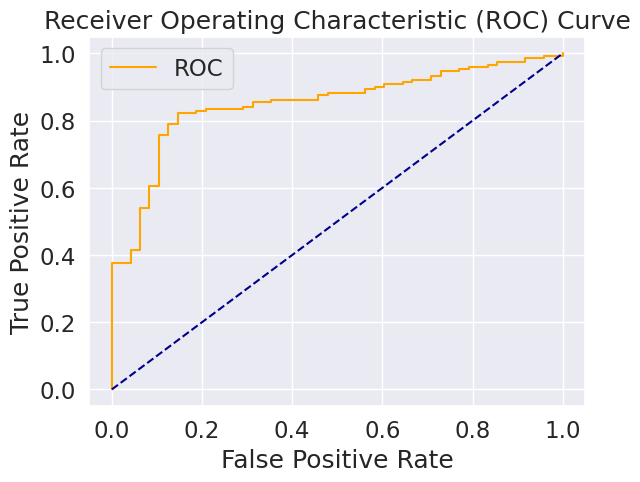

In [50]:
pred_prob = model.predict_proba(Test)[:,1]
from sklearn import metrics
def plot_roc_curve(fpr, tpr):
 plt.plot(fpr, tpr, color='orange', label='ROC')
 plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('Receiver Operating Characteristic (ROC) Curve')
 plt.legend()
 plt.show()
y_true = Y_Test
y_scores = pred_prob
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores)
print(tpr)
print(fpr)
print(thresholds)
print(metrics.roc_auc_score(y_true, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [51]:
pred = 1*(pred_prob > optimal_threshold)
#After finding optimal threshold from ROC
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.825

 clasification report:
               precision    recall  f1-score   support

           0       0.59      0.85      0.70        48
           1       0.95      0.82      0.88       152

    accuracy                           0.82       200
   macro avg       0.77      0.83      0.79       200
weighted avg       0.86      0.82      0.83       200


 confussion matrix:
 [[ 41   7]
 [ 28 124]]


## Training XGBoost on balanced data

#### Data Imbalance handling: Method used here — Oversampling Minority Class (By creation of synthetic data in minority class)

###### SMOTE
###### SMOTE + Tomek
###### SMOTE + EEN
###### ADASYN

In [52]:
print(df[df['fraud_reported']==0].shape )
print(df[df['fraud_reported']==1].shape )

(247, 29)
(752, 29)


In [53]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(Y_Train)
print('Before', counter)
smt = SMOTE()
Train_smt, Y_Train_smt = smt.fit_resample(Train, Y_Train)
counter = Counter(Y_Train_smt)
print('After', counter)

Before Counter({1: 600, 0: 199})
After Counter({1: 600, 0: 600})


In [54]:
model = model.fit(Train_smt, Y_Train_smt) #model is hyperparameter optimized XGBoost model
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.805

 clasification report:
               precision    recall  f1-score   support

           0       0.57      0.73      0.64        48
           1       0.91      0.83      0.87       152

    accuracy                           0.81       200
   macro avg       0.74      0.78      0.75       200
weighted avg       0.83      0.81      0.81       200


 confussion matrix:
 [[ 35  13]
 [ 26 126]]


In [55]:
from imblearn.combine import SMOTETomek
from collections import Counter
counter = Counter(Y_Train)
print('Before', counter)
smtom = SMOTETomek(random_state = 139)
Train_smtom, Y_Train_smtom = smtom.fit_resample(Train, Y_Train)
counter = Counter(Y_Train_smtom)
print('After', counter)

Before Counter({1: 600, 0: 199})
After Counter({1: 578, 0: 578})


In [57]:
model = model.fit(Train_smtom, Y_Train_smtom)
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.795

 clasification report:
               precision    recall  f1-score   support

           0       0.56      0.65      0.60        48
           1       0.88      0.84      0.86       152

    accuracy                           0.80       200
   macro avg       0.72      0.74      0.73       200
weighted avg       0.81      0.80      0.80       200


 confussion matrix:
 [[ 31  17]
 [ 24 128]]


In [58]:
from imblearn.combine import SMOTEENN
from collections import Counter
counter = Counter(Y_Train)
print('Before', counter)
smteen = SMOTEENN()
Train_smteen, Y_Train_smteen = smteen.fit_resample(Train, Y_Train)
counter = Counter(Y_Train_smteen)
print('After', counter)

Before Counter({1: 600, 0: 199})
After Counter({0: 369, 1: 221})


In [59]:
model = model.fit(Train_smteen, Y_Train_smteen)
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.73

 clasification report:
               precision    recall  f1-score   support

           0       0.46      0.71      0.56        48
           1       0.89      0.74      0.81       152

    accuracy                           0.73       200
   macro avg       0.67      0.72      0.68       200
weighted avg       0.79      0.73      0.75       200


 confussion matrix:
 [[ 34  14]
 [ 40 112]]


In [60]:
from imblearn.over_sampling import ADASYN
from collections import Counter
counter = Counter(Y_Train)
print('Before', counter)
ada = ADASYN(random_state = 130)
Train_ada, Y_Train_ada = ada.fit_resample(Train, Y_Train)
counter = Counter(Y_Train_ada)
print('After', counter)

Before Counter({1: 600, 0: 199})
After Counter({0: 621, 1: 600})


In [61]:
model = model.fit(Train_ada, Y_Train_ada)
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.8

 clasification report:
               precision    recall  f1-score   support

           0       0.57      0.69      0.62        48
           1       0.89      0.84      0.86       152

    accuracy                           0.80       200
   macro avg       0.73      0.76      0.74       200
weighted avg       0.82      0.80      0.81       200


 confussion matrix:
 [[ 33  15]
 [ 25 127]]


###### Treating the ratio between two classes as imbalance and working upon it was not effective in this case as best performance metrics after the process were less than performance metrics before the process with hyperparameter optimized XGB Classifier. But it’s an integral step to check for potential improvement by handling suspected imbalances in dataset.

# Predictive System

In [64]:
df.head(1)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind,pred
0,328,48,0,0,1000,1406.91,466132,0,0,0,...,2,71610,6510,13020.0,0,0,2004,0,3,0


In [68]:
# Get the values of the first row and convert them to a list
first_row_values = df.iloc[0].tolist()

print(first_row_values)

[328.0, 48.0, 0.0, 0.0, 1000.0, 1406.91, 466132.0, 0.0, 0.0, 0.0, 0.0, 53300.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 1.0, 2.0, 71610.0, 6510.0, 13020.0, 0.0, 0.0, 2004.0, 0.0, 3.0, 0.0]


In [69]:
input_data = (328.0, 48.0, 0.0, 0.0, 1000.0, 1406.91, 466132.0, 0.0, 0.0, 0.0, 0.0, 53300.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 1.0, 2.0, 71610.0, 6510.0, 13020.0, 0.0, 0.0, 2004.0, 3.0)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Fraud')
else:
  print('Not Fraud')

[0]
Fraud
